## Business Understanding
Predicting the type  

## Data Understanding

In [254]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score

In [197]:
#loading the data
df=pd.read_excel('my_data.xlsx')
df.head()

,customer,location,soap_type,quantity,age,payment_type,Unnamed: 6,Points,Explanation/Questions
0,1,rural,single,3.0,34.0,check,NaN,NaN,Type of soap is your outcome variable
1,2,rural,single,5.0,43.0,credit card,NaN,10,Summarize the data
2,3,rural,single,7.0,91.0,credit card,NaN,10,Clean up the data set and document your actions
3,4,rural,single,5.0,91.0,check,NaN,10,Summarize the data after clean up
4,5,rural,twin,3.0,27.0,cash,NaN,10 each,Create at least four sets of visuals to descri...


In [198]:
df.tail()

,customer,location,soap_type,quantity,age,payment_type,Unnamed: 6,Points,Explanation/Questions
4995,4996,urban,liquid,9.0,20.0,check,NaN,NaN,NaN
4996,4997,urban,liquid,2.0,70.0,credit card,NaN,NaN,NaN
4997,4998,urban,liquid,1.0,21.0,check,NaN,NaN,NaN
4998,4999,urban,liquid,8.0,76.0,cash,NaN,NaN,NaN
4999,5000,urban,liquid,9.0,86.0,cash,NaN,NaN,NaN


In [199]:
df.describe()

,customer,quantity,age,Unnamed: 6
count,5000.000000,4500.000000,4500.000000,0.0
mean,2500.500000,5.524000,58.559111,NaN
std,1443.520003,2.847085,23.337637,NaN
min,1.000000,1.000000,18.000000,NaN
25%,1250.750000,3.000000,38.000000,NaN
50%,2500.500000,6.000000,58.000000,NaN
75%,3750.250000,8.000000,79.000000,NaN
max,5000.000000,10.000000,98.000000,NaN


In [200]:
df.dtypes

customer                   int64
location                  object
soap_type                 object
quantity                 float64
age                      float64
payment_type              object
Unnamed: 6               float64
Points                    object
Explanation/Questions     object
dtype: object

### Data Cleaning

In [201]:
## dropping unwanted columns
df.drop(axis=1,columns=['Unnamed: 6','Points','Explanation/Questions'],inplace=True)


In [202]:
df

,customer,location,soap_type,quantity,age,payment_type
0,1,rural,single,3.0,34.0,check
1,2,rural,single,5.0,43.0,credit card
2,3,rural,single,7.0,91.0,credit card
3,4,rural,single,5.0,91.0,check
4,5,rural,twin,3.0,27.0,cash
...,...,...,...,...,...,...
4995,4996,urban,liquid,9.0,20.0,check
4996,4997,urban,liquid,2.0,70.0,credit card
4997,4998,urban,liquid,1.0,21.0,check
4998,4999,urban,liquid,8.0,76.0,cash


df

In [203]:
# correcting

In [204]:
def data_checking(df1):
    "A function that checks for missing values and duplicates"
    print("Columns and thier mising values")
    missing=df1.isna().sum()
    print(missing)
    
    print('________')
    print('Percentage of missing values')
    perc_missing=df1.isna().sum()/len(df1)*100
    print(perc_missing)
    
    print('____________')
    print('This are the duplicates')
    
    dups=df1.duplicated().sum()
    print(dups)
    
    

In [205]:
data_checking(df)

Columns and thier mising values
customer          0
location          0
soap_type         0
quantity        500
age             500
payment_type    500
dtype: int64
________
Percentage of missing values
customer         0.0
location         0.0
soap_type        0.0
quantity        10.0
age             10.0
payment_type    10.0
dtype: float64
____________
This are the duplicates
0


In [206]:
df.head()

,customer,location,soap_type,quantity,age,payment_type
0,1,rural,single,3.0,34.0,check
1,2,rural,single,5.0,43.0,credit card
2,3,rural,single,7.0,91.0,credit card
3,4,rural,single,5.0,91.0,check
4,5,rural,twin,3.0,27.0,cash


In [207]:
#filling the quantity  missing values
mean_val=df['quantity'].mean()
df['quantity'].fillna(value=mean_val,inplace=True)

#filling the age missing values
age_val=df['age'].mean()
df['age'].fillna(value=age_val,inplace=True)

df['payment_type'].ffill(inplace=True)

In [208]:
df.isna().sum()/len(df)*100

customer        0.0
location        0.0
soap_type       0.0
quantity        0.0
age             0.0
payment_type    0.0
dtype: float64

In [209]:
df = df.astype({"quantity": int, "age": int})

In [210]:
df.dtypes

customer         int64
location        object
soap_type       object
quantity         int32
age              int32
payment_type    object
dtype: object

## Feature engineering

In [211]:
df['quantity'].value_counts()

5     931
7     496
6     474
3     472
8     455
9     452
2     443
1     433
10    428
4     416
Name: quantity, dtype: int64

In [212]:
df['age'].value_counts()

58    564
64     72
88     71
30     71
38     70
     ... 
70     44
18     44
92     42
80     39
61     38
Name: age, Length: 81, dtype: int64

In [213]:
df['payment_type'].value_counts()

credit card    1698
cash           1664
check          1638
Name: payment_type, dtype: int64

In [214]:
df1=df.copy()
df1.head()

,customer,location,soap_type,quantity,age,payment_type
0,1,rural,single,3,34,check
1,2,rural,single,5,43,credit card
2,3,rural,single,7,91,credit card
3,4,rural,single,5,91,check
4,5,rural,twin,3,27,cash


In [215]:
# Binning the age
def age_cat(age):
    """A function that bins ages into different groups"""
    if age <= 19 :
        return "Teenagers"
    elif age > 19 and age <= 30 :
        return "Youths"
    elif age >30 and age <= 55 :
        return "Adult"
    else :
        return "Elderly"
    
# applying the function to create a new column
df1["age_cat"] = df1['age'].apply(age_cat)
df1.head()

,customer,location,soap_type,quantity,age,payment_type,age_cat
0,1,rural,single,3,34,check,Adult
1,2,rural,single,5,43,credit card,Adult
2,3,rural,single,7,91,credit card,Elderly
3,4,rural,single,5,91,check,Elderly
4,5,rural,twin,3,27,cash,Youths


In [216]:
# Binning the quantities
def quantities(quantity):
    """A function that bins quantities"""
    if quantity <= 3 :
        return "Low"
    elif quantity > 3 and quantity <= 6 :
        return "medium"
    else:
        return "High"
    
# Applying the function to create a new column
df1["new_quant"] = df1["quantity"].apply(quantities)
df1.head()

,customer,location,soap_type,quantity,age,payment_type,age_cat,new_quant
0,1,rural,single,3,34,check,Adult,Low
1,2,rural,single,5,43,credit card,Adult,medium
2,3,rural,single,7,91,credit card,Elderly,High
3,4,rural,single,5,91,check,Elderly,medium
4,5,rural,twin,3,27,cash,Youths,Low


## Exploratory data analysis

### Univariate Analysis

In [217]:

# checking the value counts
for column in df.columns:
    print(df[column].value_counts())

1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: customer, Length: 5000, dtype: int64
rural       2320
suburban    1530
urban       1150
Name: location, dtype: int64
single    1850
twin      1250
bundle     975
liquid     925
Name: soap_type, dtype: int64
5     931
7     496
6     474
3     472
8     455
9     452
2     443
1     433
10    428
4     416
Name: quantity, dtype: int64
58    564
64     72
88     71
30     71
38     70
     ... 
70     44
18     44
92     42
80     39
61     38
Name: age, Length: 81, dtype: int64
credit card    1698
cash           1664
check          1638
Name: payment_type, dtype: int64


In [218]:
#  Plotting a pie chart 
def pie_chart(df, column):
    """A function that plots a pie chart for a given column in a DataFrame"""
    fig, ax = plt.subplots(figsize=(10, 8))
    explode = [0.06] * len(df[column].unique())  # create explode list based on number of unique values

    df[column].value_counts().plot(kind="pie", autopct="%1.1f%%", explode=explode, ax=ax)
    ax.set_title(f"Distribution of {column}")
    plt.show()
    
# Plotting a bar graph
def bar_graph(df,column):
    """A function that plots an horizontal for a given column in a DataFrame"""
    plt.figure(figsize=(16,8))
    sns.countplot(x=column,data=df,order=df[column].value_counts().index)
    plt.title(f'{column} Distribution')
    plt.ylabel('count')
    plt.show

### Soap type Distribution

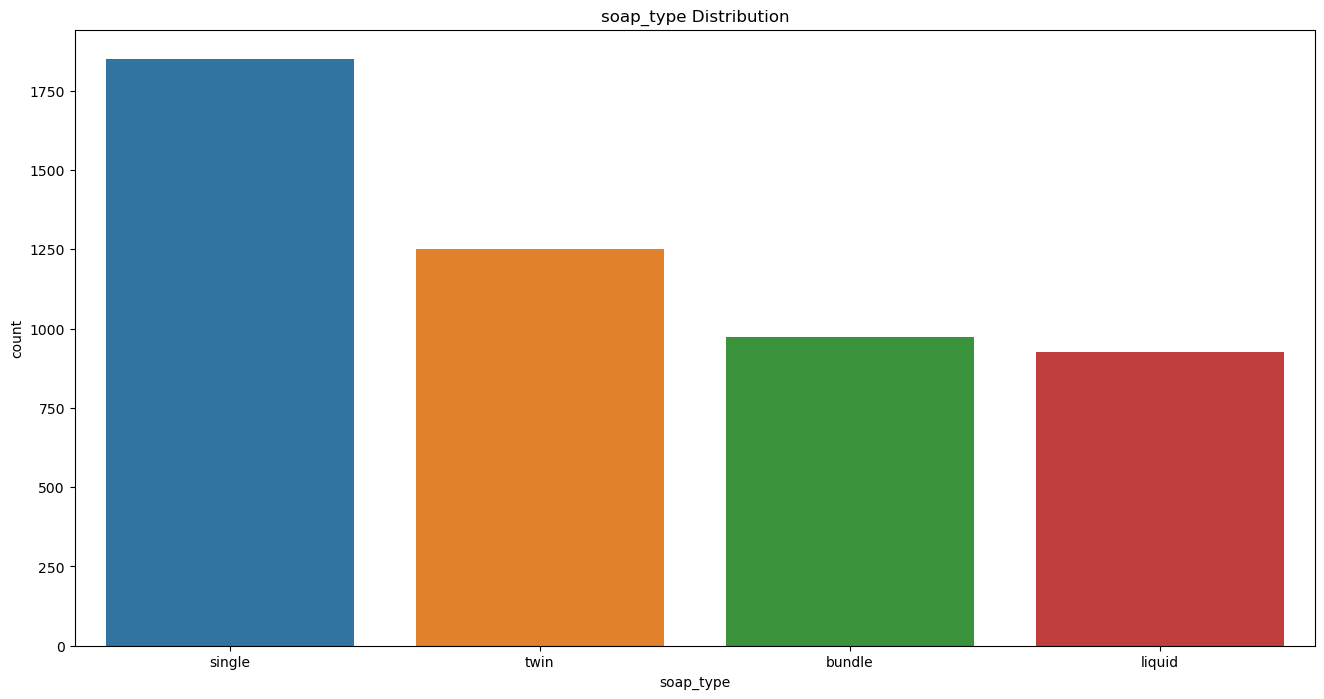

In [219]:
bar_graph(df1,'soap_type')

From the above we can see that the "single" soap is mostly purchased by our customers followed closely by the "twin" soap.The "bundle" and "liquid" soap are the least used products,there's no significant difference between the two

### Age Category Distribution

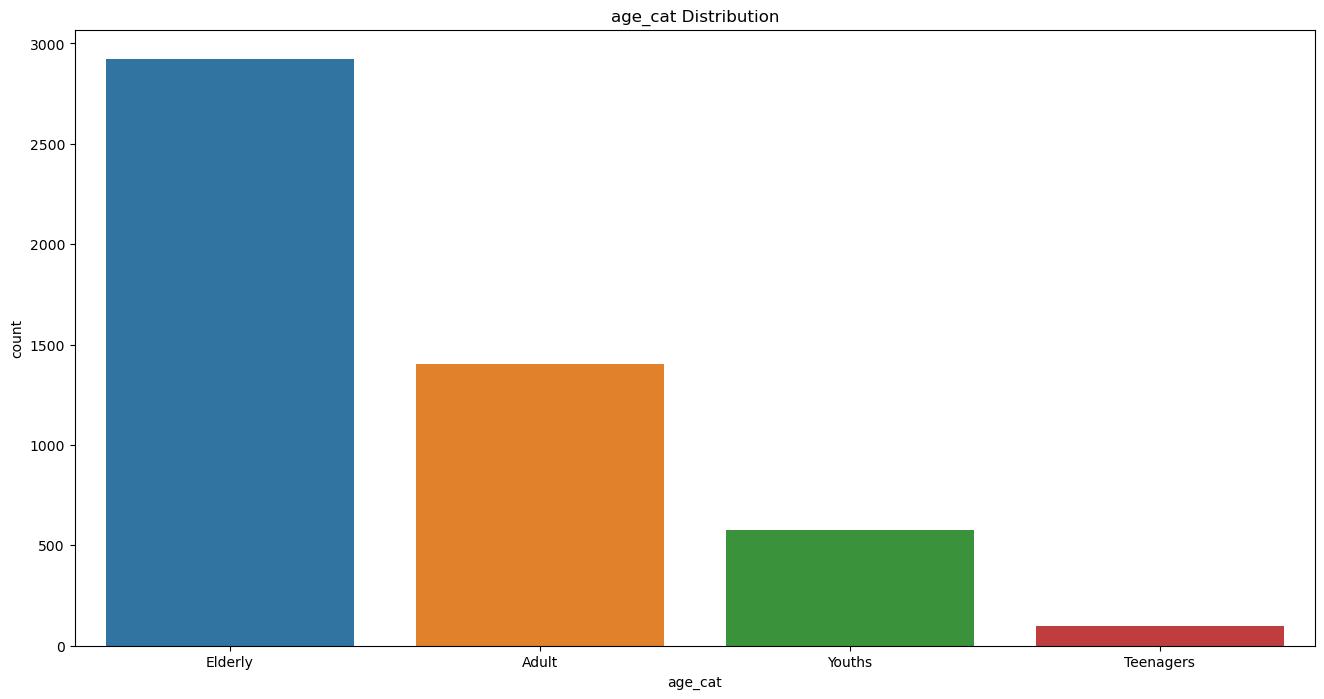

In [220]:
bar_graph(df1,"age_cat")

Most of our soap users are the Elderly,followed by the Adults.The Youths and the Teenagers are the least soap users

### Quantity Distribution

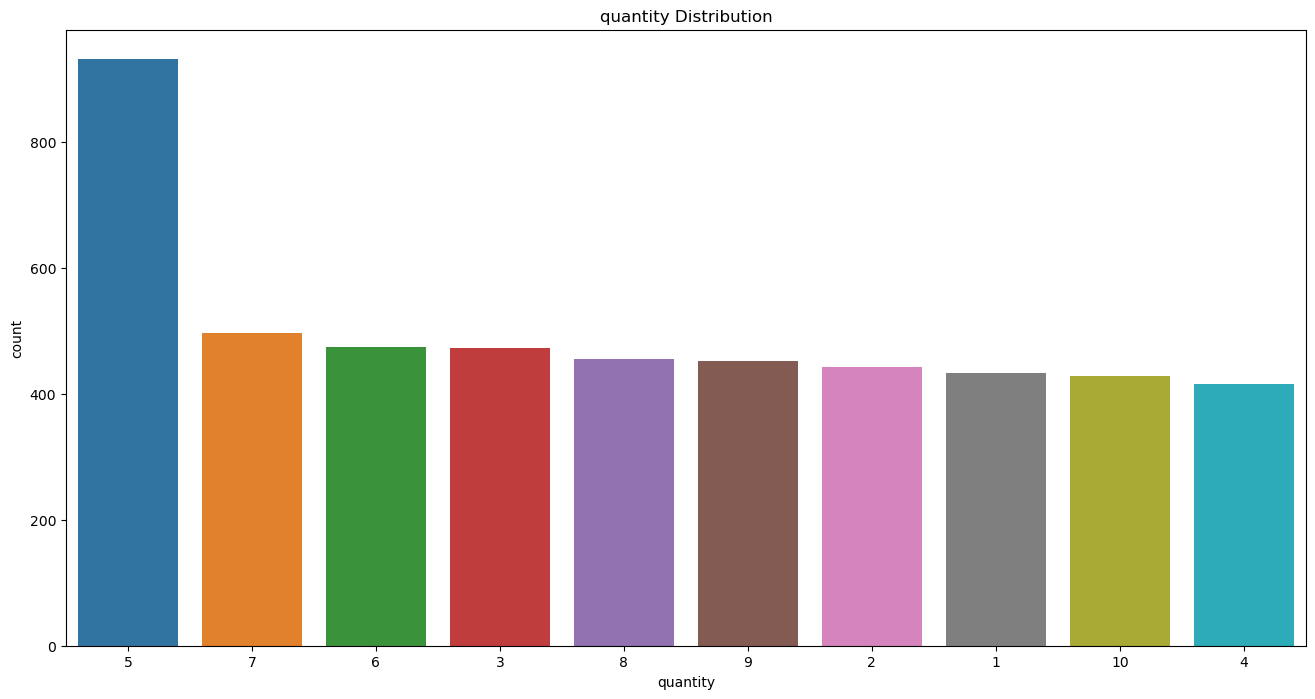

In [221]:
bar_graph(df1,"quantity")

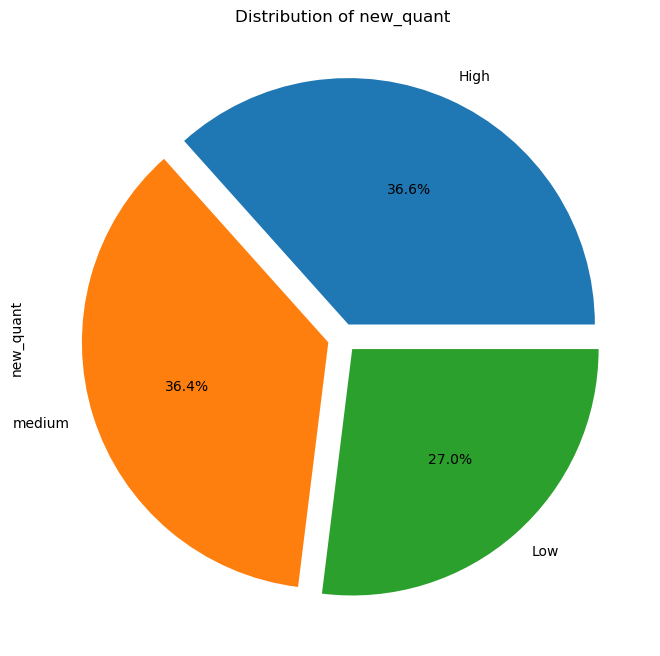

In [222]:
pie_chart(df1,"new_quant")

There isnt much difference between the quantities,most of our customers purchase soap in units of 5

### Location distribution

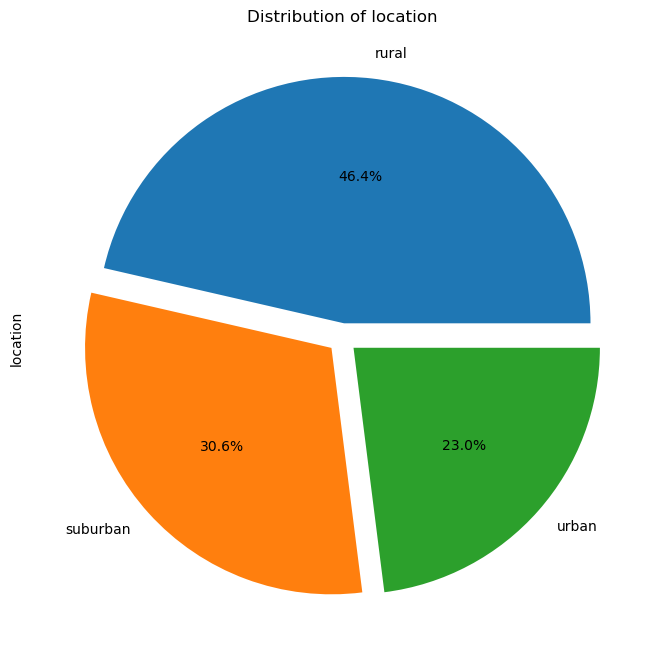

In [223]:
pie_chart(df1,"location")

About 46.4 % of our users are from the rural areas,Sub- urban areas makeup around 30.6 % ,the least soap users are from the urban areas comprising around 23.0 % of our data.

### Payment type Distribution

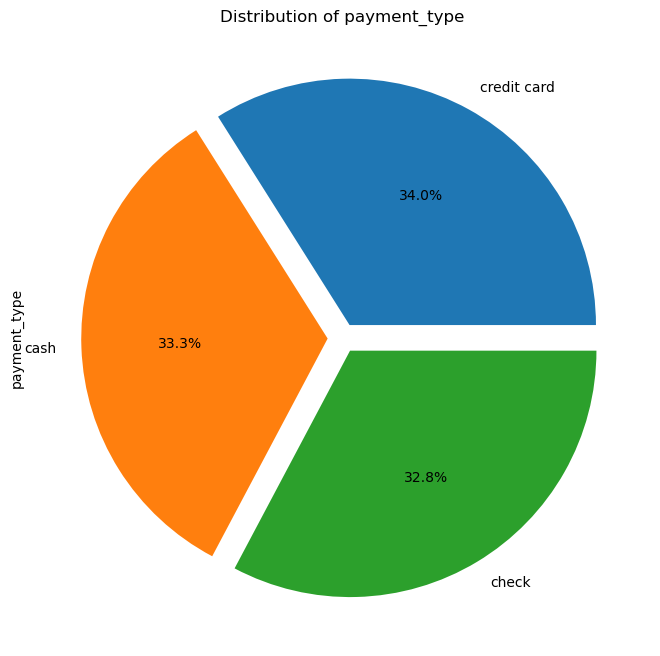

In [224]:
pie_chart(df1,"payment_type")

There is no significance difference in the payment mode of our users

## Bivariate Analysis

In [225]:
def biv_graph ( df, column1, column2):
    """A function that plots a bivariate graph """
    plt.figure(figsize= (16,8))
    sns.countplot(data = df1, x = column1,  hue = column2)
    plt.title (f"Relationship between {column1} and  {column2}")
    plt.ylabel("Distribution Count")
    plt.show()
    


### Relationship between Soap Type and Location

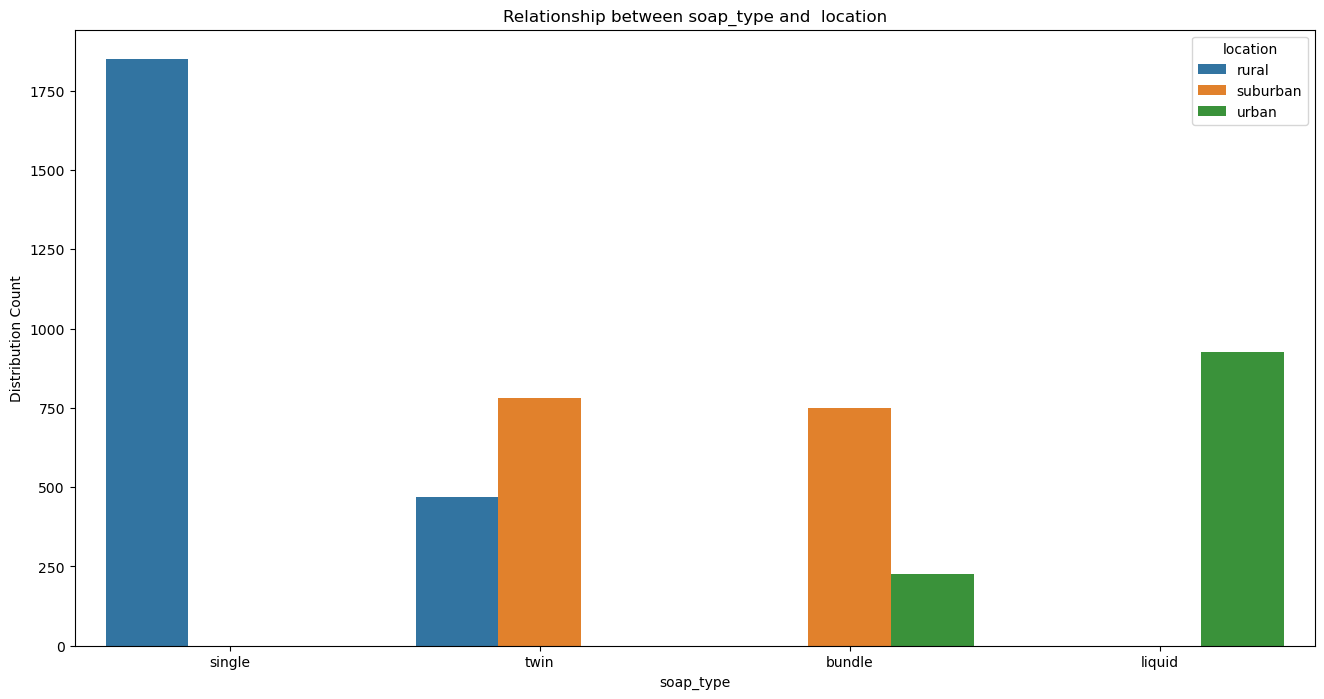

In [226]:
biv_graph(df1,"soap_type","location")

We can see that the single soap is mostly used in urban areas ,while the liquid soap is mostly used in urban areas.Few twin soap is usedin rural and surban areas ,this also applies to the bundle type of soap

### Relationship between soap type and age group.

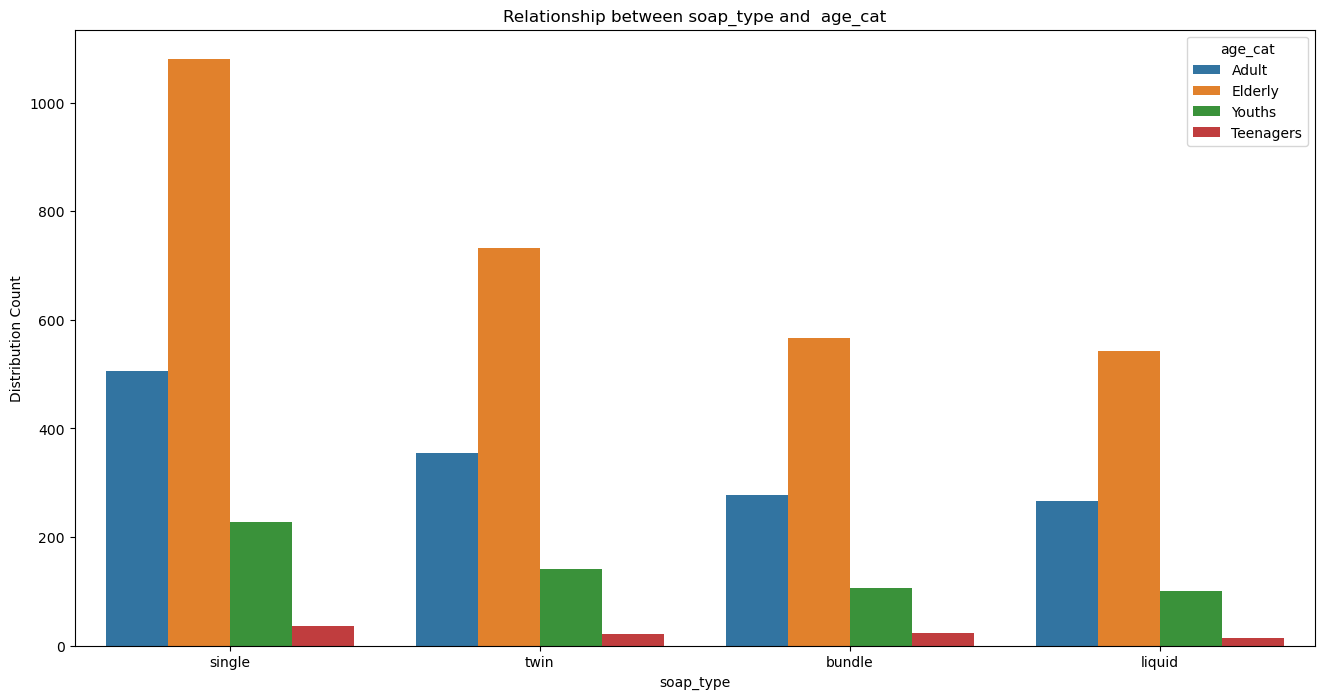

In [227]:
biv_graph(df1,"soap_type","age_cat")

We can see the pattern  applies to all types of soap,the elderly,adult,youths,teenagers purchase soap in decreasing order respectively

### Statistical Analysis

## Checking for normality in Age and Quantity

<AxesSubplot: xlabel='quantity', ylabel='Density'>

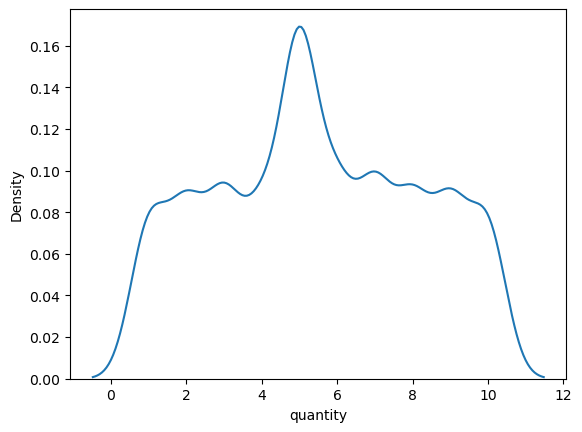

In [228]:

sns.kdeplot(df['quantity'])

<AxesSubplot: xlabel='age', ylabel='Density'>

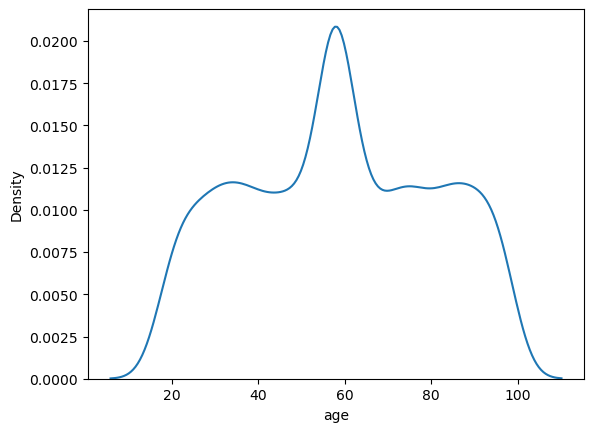

In [229]:
sns.kdeplot(df["age"])

We can see that both age and quantity follow a normal distribution

## Data Preprocessing 

### Converting our target variable into numerical format

In [230]:
# reassigning the variables
ren = { "single" : 0 , "twin" : 1 , "bundle" : 2, "liquid" : 3}
# replacing the items
df["soap"] = df["soap_type"].replace(ren)
df.head()

,customer,location,soap_type,quantity,age,payment_type,soap
0,1,rural,single,3,34,check,0
1,2,rural,single,5,43,credit card,0
2,3,rural,single,7,91,credit card,0
3,4,rural,single,5,91,check,0
4,5,rural,twin,3,27,cash,1


In [231]:
# specifying our target and feature columns
# target column
y = df["soap"]
# feature columns
X = df.drop(columns=["customer", "soap_type", "soap"])


### One hot Encoding and Scaling our data

In [232]:
 # One hot encoding our variables
X = pd.get_dummies(X, columns=["location", "payment_type"]) 

In [233]:
X

,quantity,age,location_rural,location_suburban,location_urban,payment_type_cash,payment_type_check,payment_type_credit card
0,3,34,1,0,0,0,1,0
1,5,43,1,0,0,0,0,1
2,7,91,1,0,0,0,0,1
3,5,91,1,0,0,0,1,0
4,3,27,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
4995,9,20,0,0,1,0,1,0
4996,2,70,0,0,1,0,0,1
4997,1,21,0,0,1,0,1,0
4998,8,76,0,0,1,1,0,0


In [234]:
# using the standardscaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.91362991, -1.10682882,  1.07478947, ..., -0.70625842,
         1.43265594, -0.71710097],
       [-0.17432751, -0.70029174,  1.07478947, ..., -0.70625842,
        -0.69800429,  1.39450377],
       [ 0.5649749 ,  1.46790602,  1.07478947, ..., -0.70625842,
        -0.69800429,  1.39450377],
       ...,
       [-1.65293232, -1.69404904, -0.93041477, ..., -0.70625842,
         1.43265594, -0.71710097],
       [ 0.9346261 ,  0.79034422, -0.93041477, ...,  1.41591232,
        -0.69800429, -0.71710097],
       [ 1.3042773 ,  1.24205208, -0.93041477, ...,  1.41591232,
        -0.69800429, -0.71710097]])

In [241]:
# splitting our data into x and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [243]:
# ensuring the target variable is balanced
smo = SMOTE(random_state=42)
X_train ,y_train = smo.fit_resample(X_train, y_train)
Counter(y_train)



Counter({2: 1281, 1: 1281, 0: 1281, 3: 1281})

### KNN Classifier

In [245]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [247]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 2, 3, ..., 0, 2, 1], dtype=int64)

In [260]:

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.6213333333333333


## Hyperparameter Tuning

In [280]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : [3,6,7,8,10,11],
               'weights' : ['uniform' , 'distance'],
               'metric' : ['minkowski' , 'euclidean' , 'manhattan']}

gs = GridSearchCV( KNeighborsClassifier(), grid_params,verbose=1,cv=3,n_jobs = -1)

g_res = gs.fit(X_train , y_train)

# finding the best score
print(g_res.best_score_)

# getting the hyperparameters with the best score
g_res.best_params_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.7353629976580797


{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

### Using the best parameters 

In [268]:
knn= KNeighborsClassifier(n_neighbors= 11, metric = 'manhattan', weights = 'distance')

In [269]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [275]:
y_pred1 = knn.predict(X_test)
y_pred2 = knn.predict(X_train)

In [271]:
result2 = accuracy_score(y_test,y_pred1)
print("Accuracy:",result2)

Accuracy: 0.6446666666666667


### Model Evaluation

In [276]:
print ("Training set accuracy",accuracy_score(y_train,y_pred2))
print("Test set accuracy", accuracy_score(y_test,y_pred1))

Training set accuracy 0.9141295862607338
Test set accuracy 0.6446666666666667


In [281]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       569
           1       0.38      0.29      0.33       368
           2       0.43      0.40      0.41       303
           3       0.77      0.74      0.76       260

    accuracy                           0.62      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.60      0.62      0.60      1500



### Saving our Model

In [282]:
import pickle

# naming the file name
filename = "knn_model.sav"
# saving the model
pickle.dump(knn ,open(filename,'wb'))

In [284]:
load_model=pickle.load(open('knn_model.sav','rb'))
load_model.score(X_test,y_test)

0.6446666666666667